In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SLNet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'
dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale

dataset = BrainD(dir_img, dir_mask, label_numbers=target_label_numbers)
n_val = int(len(dataset) * val_percent)
n_train = len(dataset) - 2 * n_val
n_test = n_val
train, val, test = random_split(dataset, [n_train, n_val, n_test])

train_loader = DataLoader(train, batch_size=8, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val, batch_size=8, shuffle=False, num_workers=8, pin_memory=True, drop_last=True)

writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

INFO: Creating dataset with 7329 examples


In [5]:
net4 = SLNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net4.to(device=device)
train_scores4, val_scores4, train_var_4, val_var_4 = train_net(net=net4,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=1,
                                                                target_label_numbers=target_label_numbers,
                                                                dataset=dataset,
                                                                train_loader=train_loader,
                                                                val_loader=val_loader,
                                                                writer=writer)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   6597
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  99%|█████████▉| 90/91 [00:09<00:00, 11.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.0986291194682593
Validation round:  98%|█████████▊| 89/91 [00:10<00:00,  9.78batch/s]
                                                                    INFO: Validation Dice Loss: 0.09061435765617497
Validation round:  69%|██████▉   | 63/91 [00:07<00:02, 10.81batch/s]


Validation round:  99%|█████████▉| 90/91 [00:09<00:00,  9.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.08666549041703507
Validation round:  98%|█████████▊| 89/91 [00:09<00:00,  9.46batch/s]
                                                                    INFO: Validation Dice Loss: 0.09215005798326743
Validation round: 100%|██████████| 91/91 [00:09<00:00, 10.52batch/s]
                                                                    INFO: Validation Dice Loss: 0.0807015849993779
Validation round:  82%|████████▏ | 75/91 [00:07<00:01, 12.54batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.07607436990672416
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 11.94batch/s]
                                                                    INFO: Validation Dice Loss: 0.06913048299131813
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 13.25batch/s]
                                                                    INFO: Validation Dice Loss: 0.074268418272118
Epoch 1/5:  89%|████████▉ | 5865/6597 [02:16<00:17, 43.01img/s, loss (batch)=0.319] 
INFO: Checkpoint 1 saved !
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 11.47batch/s]


                                                                    INFO: Validation Dice Loss: 0.07008942323071617
Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.06806471960230188
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 12.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.0654491507090055
Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.06604172133809917
Validation round:  42%|████▏     | 38/91 [00:03<00:04, 11.27batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.06871784560300492
Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.06882692726103815
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.96batch/s]
                                                                    INFO: Validation Dice Loss: 0.06472194710603127
Validation round:  45%|████▌     | 41/91 [00:03<00:04, 11.42batch/s]


Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 12.85batch/s]
                                                                    INFO: Validation Dice Loss: 0.06526362912340479
Epoch 2/5:  89%|████████▉ | 5865/6597 [01:57<00:14, 50.02img/s, loss (batch)=0.293] 
INFO: Checkpoint 2 saved !
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 12.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.0640620694055662
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.06467311681954416
Validation round:  89%|████████▉ | 81/91 [00:06<00:00, 12.56batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 17.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.06444753763767389
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.95batch/s]
                                                                    INFO: Validation Dice Loss: 0.06437167934664004
Validation round:  98%|█████████▊| 89/91 [00:06<00:00, 16.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.06404056326373593
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 15.10batch/s]
                                                                    INFO: Validation Dice Loss: 0.06436557511051932
Validation round:  27%|██▋       | 25/91 [00:02<00:08,  8.11batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 17.46batch/s]
                                                                    INFO: Validation Dice Loss: 0.06426721655732982
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 15.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.06432925967069772
Epoch 3/5:  89%|████████▉ | 5865/6597 [01:55<00:14, 50.74img/s, loss (batch)=0.308] 
INFO: Checkpoint 3 saved !
Validation round:  98%|█████████▊| 89/91 [00:06<00:00, 17.25batch/s]
                                                                    INFO: Validation Dice Loss: 0.06423200699654254
Validation round:  56%|█████▌    | 51/91 [00:04<00:03, 11.09batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 14.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.06424966863878481
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 14.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.06421438367157192
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.06422188681560559
Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.12batch/s]
                                                                    INFO: Validation Dice Loss: 0.06422067507282718
Validation round:   0%|          | 0/91 [00:00<?, ?batch/s]


Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.06batch/s]
                                                                    INFO: Validation Dice Loss: 0.06421849328082996
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 14.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.06421886130676165
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 14.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.06421949722609677
Epoch 4/5:  89%|████████▉ | 5865/6597 [01:55<00:14, 50.59img/s, loss (batch)=0.273] 
INFO: Checkpoint 4 saved !
Validation round:  56%|█████▌    | 51/91 [00:04<00:03, 12.88batch/s]


Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 15.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.064219801062411
Validation round:  98%|█████████▊| 89/91 [00:07<00:00, 12.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.0642193690106109
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.06421978599750079
Validation round:  99%|█████████▉| 90/91 [00:09<00:00,  9.63batch/s]


                                                                    INFO: Validation Dice Loss: 0.06421953701710963
Validation round: 100%|██████████| 91/91 [00:09<00:00,  9.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.06422008516696784
Validation round:  99%|█████████▉| 90/91 [00:09<00:00, 12.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.06421915842936589
Validation round:  93%|█████████▎| 85/91 [00:08<00:00, 10.99batch/s]


Validation round:  98%|█████████▊| 89/91 [00:08<00:00, 13.64batch/s]
                                                                    INFO: Validation Dice Loss: 0.06421979836055211
Validation round: 100%|██████████| 91/91 [00:09<00:00, 10.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.0642172776899495
Epoch 5/5:  89%|████████▉ | 5865/6597 [02:23<00:17, 41.00img/s, loss (batch)=0.261]
INFO: Checkpoint 5 saved !


configuring plot four


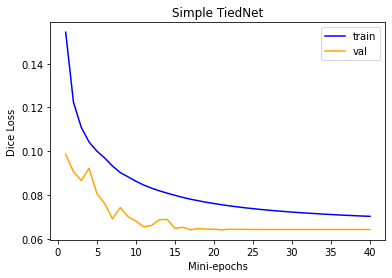

In [6]:
print("configuring plot four")
domain = len(train_scores4)
x_values = [i+1 for i in range(domain)]
plt.title("Simple TiedNet")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")
plt.plot(x_values, train_scores4, color="blue", label="train")
plt.plot(x_values, val_scores4, color="orange", label="val")
plt.legend()
plt.show()
plt.close()